## Task1

### Import libraries

In [188]:
# to avoid all the warnings
import warnings
warnings.filterwarnings('ignore')

#libraries for numerics
import pandas as pd
import numpy as np

#Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,adjusted_rand_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold

#to display all plots within the notebook
%matplotlib inline

### Load the data and display first 5 rows.

In [189]:
cancer_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )
cancer_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,...,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,...,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,...,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,...,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,...,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


### Perform Exploratory Data Analysis

In [190]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   binnedInc                3051 non-null   object 
 8   MedianAge                3051 non-null   float64
 9   MedianAgeMale            3051 non-null   float64
 10  MedianAgeFemale          3051 non-null   float64
 11  Geography                3051 non-null   object 
 12  AvgHouseholdSize         3051 non-null   float64
 13  PercentMarried           3051 non-null   float64
 14  PctNoHS18_24            

In [191]:
cancer_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
count,3051.000000,3051.000000,3051.000000,3051.000000,3.051000e+03,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,...,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,570.668154,176.000983,449.007042,46902.917076,9.495799e+04,16.880367,158.695936,44.303540,39.600885,42.234579,...,41.342347,36.287545,19.198820,84.005243,9.166570,1.198561,1.864829,51.355837,5.608851,178.909767
std,1250.546532,445.042777,52.886386,11902.460659,2.761007e+05,6.340462,544.035590,38.704107,5.177629,5.253474,...,9.327793,7.748442,6.023164,16.126982,14.676772,2.369931,3.235204,6.524964,1.955201,27.570075
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,...,14.300000,11.800000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000,66.300000
25%,80.000000,29.000000,421.800000,38752.000000,1.236850e+04,12.200000,0.000000,37.900000,36.400000,39.200000,...,34.700000,31.000000,14.900000,78.012571,0.616576,0.261748,0.282825,47.736828,4.499936,161.400000
50%,171.000000,62.000000,453.549422,45098.000000,2.677700e+04,15.900000,0.000000,41.000000,39.500000,42.400000,...,41.300000,36.300000,18.800000,90.318790,2.276756,0.557031,0.791571,51.757925,5.384471,178.300000
75%,508.000000,148.000000,481.300000,52410.500000,6.853600e+04,20.400000,86.581336,43.900000,42.500000,45.300000,...,47.700000,41.400000,23.000000,95.577396,10.326954,1.189955,2.080241,55.465803,6.473896,195.500000
max,24965.000000,9445.000000,1206.900000,125635.000000,5.238216e+06,47.000000,9762.308998,525.600000,64.700000,65.700000,...,70.700000,65.100000,46.600000,100.000000,84.866024,35.640183,38.743747,71.703057,21.326165,362.800000


In [192]:
#Obtaining the percent of missing values in each variable
(cancer_data.isnull().sum()/len(cancer_data))*100

avgAnnCount                 0.000000
avgDeathsPerYear            0.000000
incidenceRate               0.000000
medIncome                   0.000000
popEst2015                  0.000000
povertyPercent              0.000000
studyPerCap                 0.000000
binnedInc                   0.000000
MedianAge                   0.000000
MedianAgeMale               0.000000
MedianAgeFemale             0.000000
Geography                   0.000000
AvgHouseholdSize            0.000000
PercentMarried              0.000000
PctNoHS18_24                0.000000
PctHS18_24                  0.000000
PctSomeCol18_24            74.270731
PctBachDeg18_24             0.000000
PctHS25_Over                0.000000
PctBachDeg25_Over           0.000000
PctEmployed16_Over          4.981973
PctUnemployed16_Over        0.000000
PctPrivateCoverage          0.000000
PctPrivateCoverageAlone    19.796788
PctEmpPrivCoverage          0.000000
PctPublicCoverage           0.000000
PctPublicCoverageAlone      0.000000
P

As seen above, the variable "PctSomeCol18_24" consists of about 74% of missing data. So, it can be dropped

In [193]:
cancer_data.drop("PctSomeCol18_24",axis = 1,inplace = True)

In [194]:
#Imputing the missing values in other columns
cancer_data.PctPrivateCoverageAlone.fillna(cancer_data["PctPrivateCoverageAlone"].mean(),inplace=True)
cancer_data.PctEmployed16_Over.fillna(cancer_data["PctEmployed16_Over"].mean(),inplace=True)
cancer_data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
TARGET_deathRate           0
dtype: int64

Now, there are no missing values in the dataset

In [195]:
#Omitting irrelevant columns
cancer_data.drop(["Geography","binnedInc"],axis=1,inplace=True)

In [196]:
# identify the duplicated data
cancer_data[cancer_data.duplicated()]

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
2285,25.000000,10,473.100000,45000,3634,12.0,0.000000,46.1,44.2,48.8,...,42.1,33.6,14.6,95.953757,0.192678,0.715662,0.000000,62.553191,9.191759,165.6
2286,116.000000,41,476.900000,48675,19858,12.3,0.000000,38.4,34.8,41.6,...,51.4,27.5,11.1,94.031435,0.480113,0.146561,0.515490,48.076923,5.713597,151.2
2287,13.000000,6,406.900000,45624,1799,13.8,0.000000,46.2,42.8,48.3,...,31.6,35.9,17.2,98.511166,0.099256,0.000000,0.248139,55.444444,5.830904,151.9
2288,335.000000,155,445.700000,41608,61109,17.5,32.728403,41.2,39.8,42.0,...,42.4,42.6,23.4,95.398451,2.154399,0.448024,0.106749,49.736708,5.379260,201.5
2289,840.000000,312,503.100000,55107,185197,11.5,1150.126622,34.8,34.0,35.6,...,54.9,25.4,12.4,86.766103,4.198567,1.784377,2.182271,47.338181,6.112106,184.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,58.000000,24,400.300000,34597,8970,20.1,0.000000,48.5,47.7,49.1,...,24.2,47.0,28.1,94.422094,0.739372,0.663260,0.456671,55.806783,4.152249,146.2
3047,63.000000,25,453.400000,40002,12531,19.3,0.000000,36.9,36.1,38.2,...,31.8,39.6,24.4,85.819227,8.455765,0.047908,4.175982,52.747975,6.256983,183.7
3048,1962.667684,7,453.549422,51923,3005,10.0,0.000000,49.2,46.0,51.9,...,42.6,35.5,14.1,96.880078,0.519987,0.000000,1.527462,57.194505,9.725159,128.7
3049,85.000000,48,383.800000,40788,17199,19.8,0.000000,42.0,36.5,45.8,...,33.3,40.2,22.5,91.590160,6.102872,0.476695,0.258945,52.060773,6.283214,209.2


In [197]:
#Dropping the duplicates
cancer_data=cancer_data.drop_duplicates()

In [198]:
#new shape after dropping the duplicates
cancer_data.shape

(2285, 31)

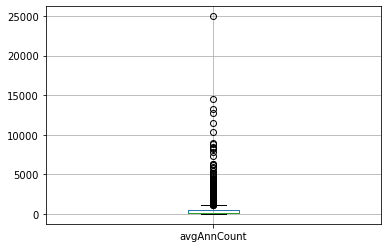

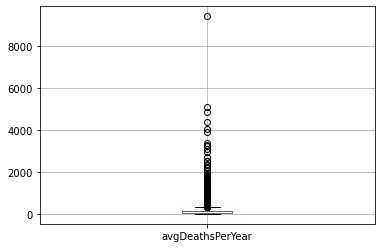

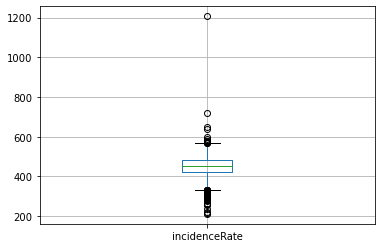

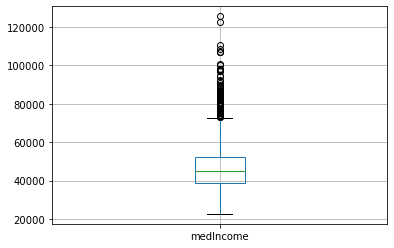

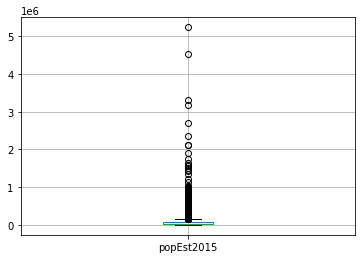

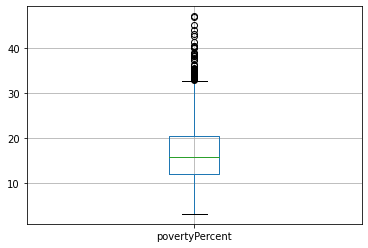

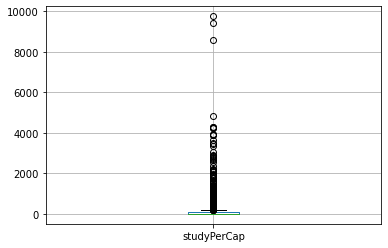

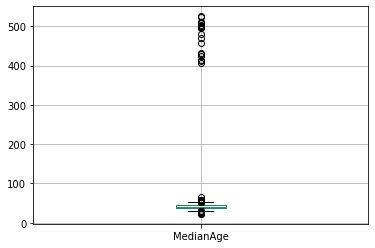

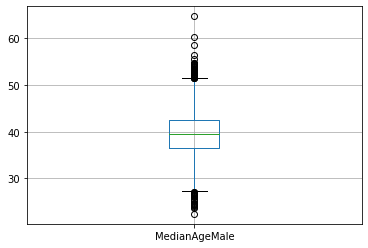

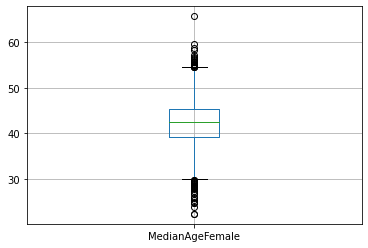

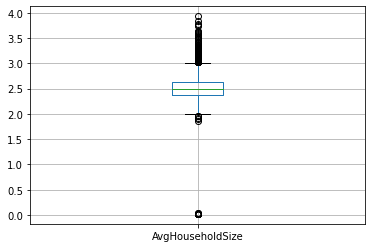

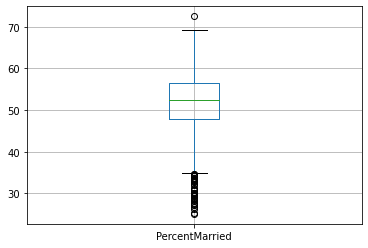

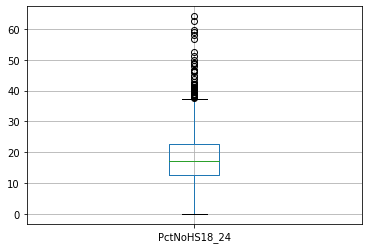

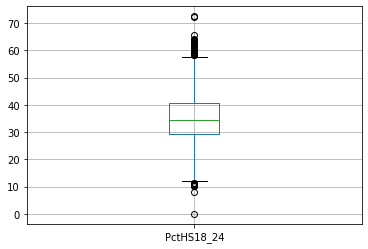

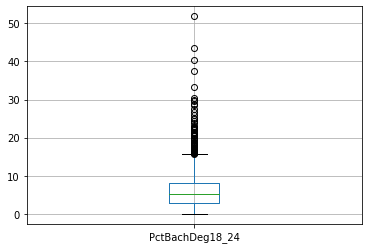

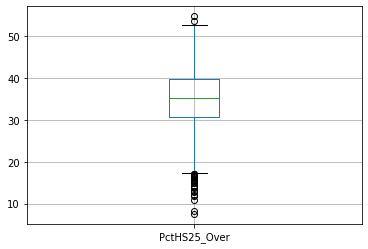

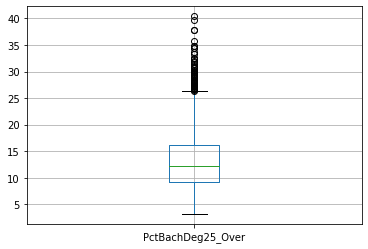

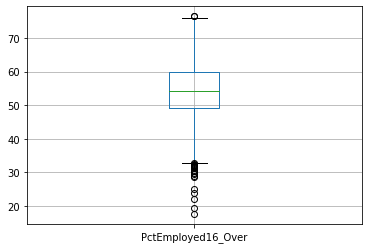

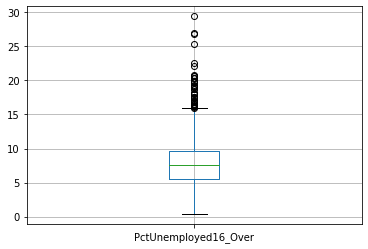

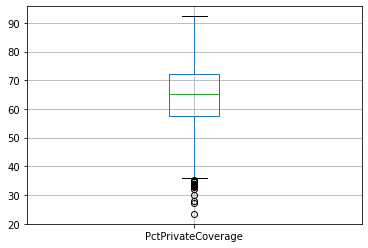

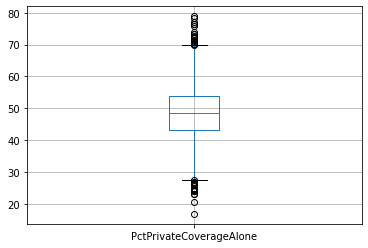

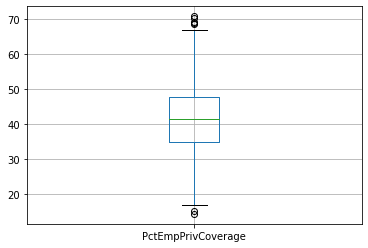

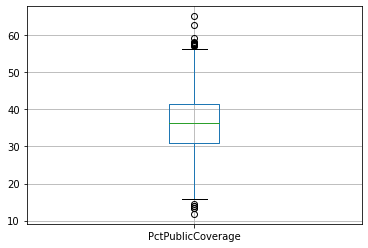

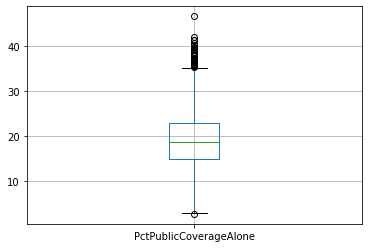

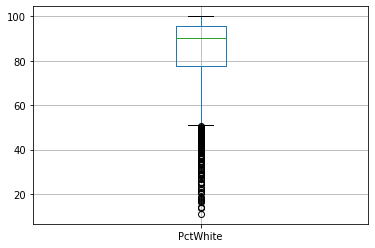

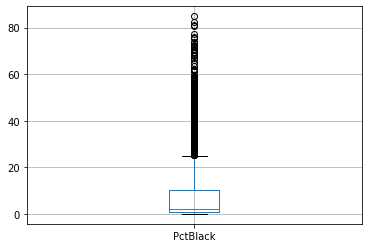

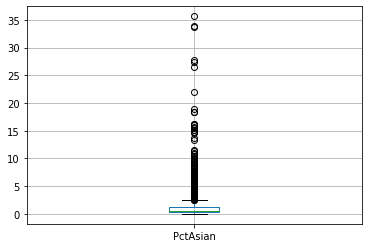

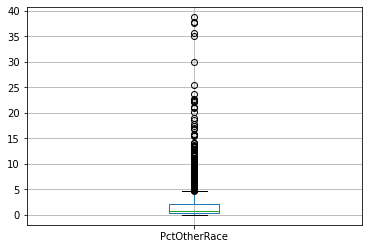

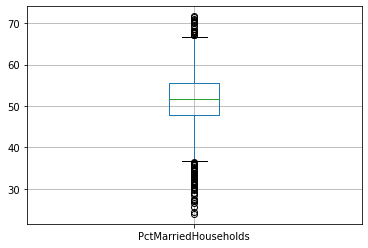

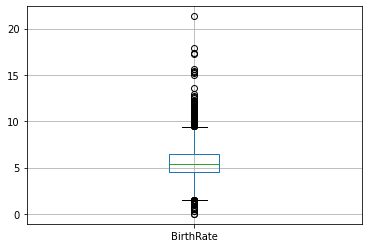

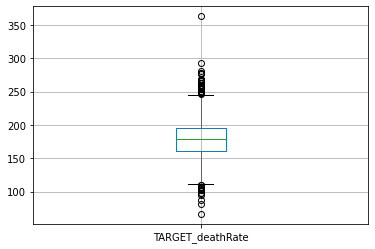

In [199]:
#Findingout Outliers in Columns :
for col in cancer_data:
    plt.figure()
    cancer_data.boxplot([col])   #to plot boxplot for all columns


In [200]:
def calculate_LB_UB (cancer_data,var):
    '''Calculating upper bound and lower bound values to identify outliers'''
    Q3=np.percentile(cancer_data[var],75)
    Q1=np.percentile(cancer_data[var],25)
    IQR=1.5*(Q3-Q1)
    
    UB=Q3+IQR
    LB=Q1-IQR
    
    print(LB,UB)
    
    return LB,UB

In [201]:
numerical_columns = cancer_data.select_dtypes('float64').columns

for i in numerical_columns:
  print("\nName of column:", i)
  LB, UB = calculate_LB_UB(cancer_data, i)

  print("min and max value: ", (cancer_data[i].min(), cancer_data[i].max()))
  print("Range of outliers: ", LB, UB)

  if cancer_data[i].max() > UB and cancer_data[i].min() < LB:
    print("----Investigate variable for outliers---")


Name of column: avgAnnCount
-573.0 1163.0
min and max value:  (6.0, 24965.0)
Range of outliers:  -573.0 1163.0

Name of column: incidenceRate
332.15 570.15
min and max value:  (211.1, 1206.9)
Range of outliers:  332.15 570.15
----Investigate variable for outliers---

Name of column: povertyPercent
-0.34999999999999964 32.849999999999994
min and max value:  (3.2, 47.0)
Range of outliers:  -0.34999999999999964 32.849999999999994

Name of column: studyPerCap
-128.706812655 214.51135442499998
min and max value:  (0.0, 9762.308998)
Range of outliers:  -128.706812655 214.51135442499998

Name of column: MedianAge
28.649999999999995 53.05
min and max value:  (22.3, 525.6)
Range of outliers:  28.649999999999995 53.05
----Investigate variable for outliers---

Name of column: MedianAgeMale
27.4 51.4
min and max value:  (22.4, 64.7)
Range of outliers:  27.4 51.4
----Investigate variable for outliers---

Name of column: MedianAgeFemale
29.800000000000008 54.599999999999994
min and max value:  (22.

### Replacing the outliers in each column with null 

#### Median Age

In [202]:
#MedianAge
cancer_data.loc[(cancer_data.MedianAge >53) + (cancer_data.MedianAge <28),'MedianAge'] = np.nan
cancer_data.MedianAge.fillna(cancer_data.MedianAge.median(),axis=0,inplace=True)

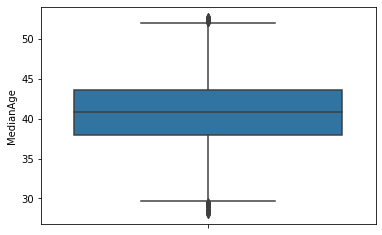

In [203]:
sns.boxplot(y='MedianAge', data = cancer_data)

#### avgAnnCount

In [204]:
cancer_data.loc[cancer_data.avgAnnCount >1163,'avgAnnCount'] = np.nan
cancer_data.avgAnnCount.fillna(cancer_data.avgAnnCount.median(),axis=0,inplace=True)

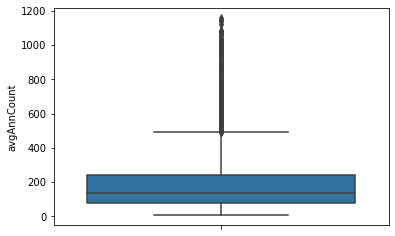

In [205]:
sns.boxplot(y='avgAnnCount', data = cancer_data)

#### incidenceRate

In [206]:
cancer_data.loc[(cancer_data.incidenceRate >570) + (cancer_data.incidenceRate <332),'incidenceRate'] = np.nan
cancer_data.incidenceRate.fillna(cancer_data.incidenceRate.median(),axis=0,inplace=True)

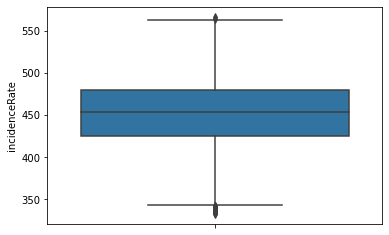

In [207]:
sns.boxplot(y='incidenceRate', data = cancer_data)

#### PctBachDeg18_24

In [208]:
cancer_data.loc[(cancer_data.PctBachDeg18_24>16),'PctBachDeg18_24'] = np.nan
cancer_data.PctBachDeg18_24.fillna(cancer_data.PctBachDeg18_24.median(),axis=0,inplace=True)

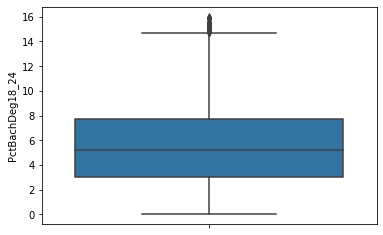

In [209]:
sns.boxplot(y='PctBachDeg18_24', data = cancer_data)

#### PctWhite

In [210]:
cancer_data.loc[(cancer_data.PctWhite<50),'PctWhite'] = np.nan
cancer_data.PctWhite.fillna(cancer_data.PctWhite.median(),axis=0,inplace=True)

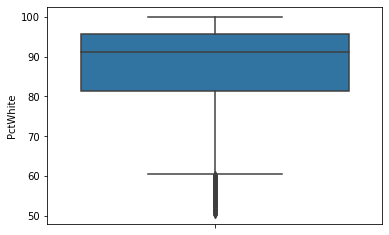

In [211]:
sns.boxplot(y='PctWhite', data = cancer_data)

#### PctBlack

In [212]:
cancer_data.loc[(cancer_data.PctBlack>25),'PctBlack'] = np.nan
cancer_data.PctBlack.fillna(cancer_data.PctBlack.median(),axis=0,inplace=True)

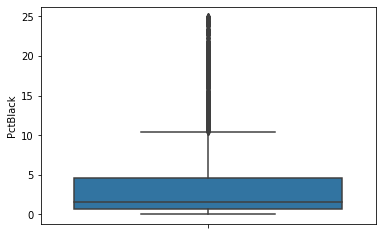

In [213]:
sns.boxplot(y='PctBlack', data = cancer_data)

#### PctAsian

In [214]:
cancer_data.loc[(cancer_data.PctAsian>3),'PctAsian'] = np.nan
cancer_data.PctAsian.fillna(cancer_data.PctAsian.median(),axis=0,inplace=True)

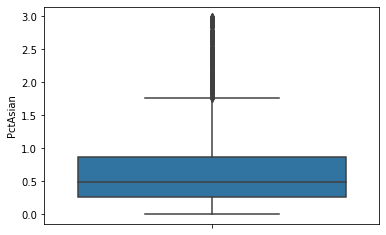

In [215]:
sns.boxplot(y='PctAsian', data = cancer_data)

#### PctOtherRace

In [216]:
cancer_data.loc[(cancer_data.PctOtherRace>5),'PctOtherRace'] = np.nan
cancer_data.PctOtherRace.fillna(cancer_data.PctOtherRace.median(),axis=0,inplace=True)

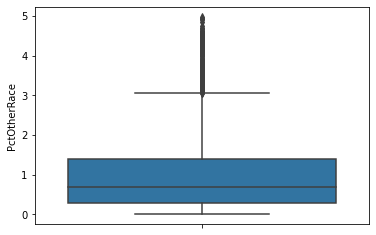

In [217]:
sns.boxplot(y='PctOtherRace', data = cancer_data)

#### BirthRate

In [218]:
cancer_data.loc[(cancer_data.BirthRate>10),'BirthRate'] = np.nan
cancer_data.BirthRate.fillna(cancer_data.BirthRate.median(),axis=0,inplace=True)

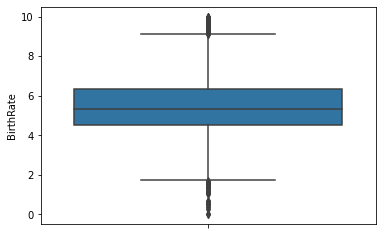

In [219]:
sns.boxplot(y='BirthRate', data = cancer_data)

### Separate the Input and Target Features of the data

In [220]:
# Normalizing data for comparision
from sklearn import preprocessing

# Scale and plot the features against TARGET_deathRate (target) using the MinMax scaler (Normalization)
min_max_scaler = preprocessing.MinMaxScaler()
col_name = cancer_data.drop('TARGET_deathRate', axis = 1).columns[:]
x = cancer_data.loc[:, col_name]
y = cancer_data['TARGET_deathRate']

# Normalizing x
x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = col_name)

# Examine the normalized data
print(cancer_data.head())
x.head()

   avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
0         19.0                 8          481.5      50038        2704   
1         88.0                34          486.0      59399       14844   
2        195.0                83          475.7      39721       25164   
3        116.0                55          496.6      30299       17917   
4         80.0                35          372.0      39625       14058   

   povertyPercent  studyPerCap  MedianAge  MedianAgeMale  MedianAgeFemale  \
0            11.1          0.0       48.4           49.6             46.4   
1             9.7          0.0       41.9           41.3             43.2   
2            18.5          0.0       48.9           47.9             49.9   
3            28.1          0.0       44.2           42.7             45.2   
4            17.4          0.0       45.0           42.2             48.0   

   ...  PctEmpPrivCoverage  PctPublicCoverage  PctPublicCoverageAlone  \
0  ...             

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,0.011265,0.000530,0.637762,0.266013,0.000358,0.180365,0.0,0.822581,0.643026,0.555300,...,0.631240,0.379433,0.429644,0.165909,0.920074,0.029052,0.000000,0.000000,0.807656,0.534560
1,0.071057,0.003283,0.656984,0.356901,0.002676,0.148402,0.0,0.560484,0.446809,0.481567,...,0.511648,0.647163,0.380863,0.231818,0.950395,0.028853,0.026951,0.008113,0.789442,0.329680
2,0.163778,0.008473,0.612986,0.165843,0.004647,0.349315,0.0,0.842742,0.602837,0.635945,...,0.511648,0.315603,0.712946,0.431818,0.951185,0.014458,0.137438,0.016550,0.629087,0.639672
3,0.095321,0.005507,0.702264,0.074363,0.003263,0.568493,0.0,0.653226,0.479905,0.527650,...,0.511648,0.175532,0.776735,0.690909,0.957874,0.006482,0.102384,0.068369,0.567043,0.512996
4,0.064125,0.003389,0.170013,0.164911,0.002526,0.324201,0.0,0.685484,0.468085,0.592166,...,0.511648,0.338652,0.585366,0.502273,0.650974,0.073504,0.227852,0.139562,0.557695,0.390093


Examining the relationship of each feature against the target variable:

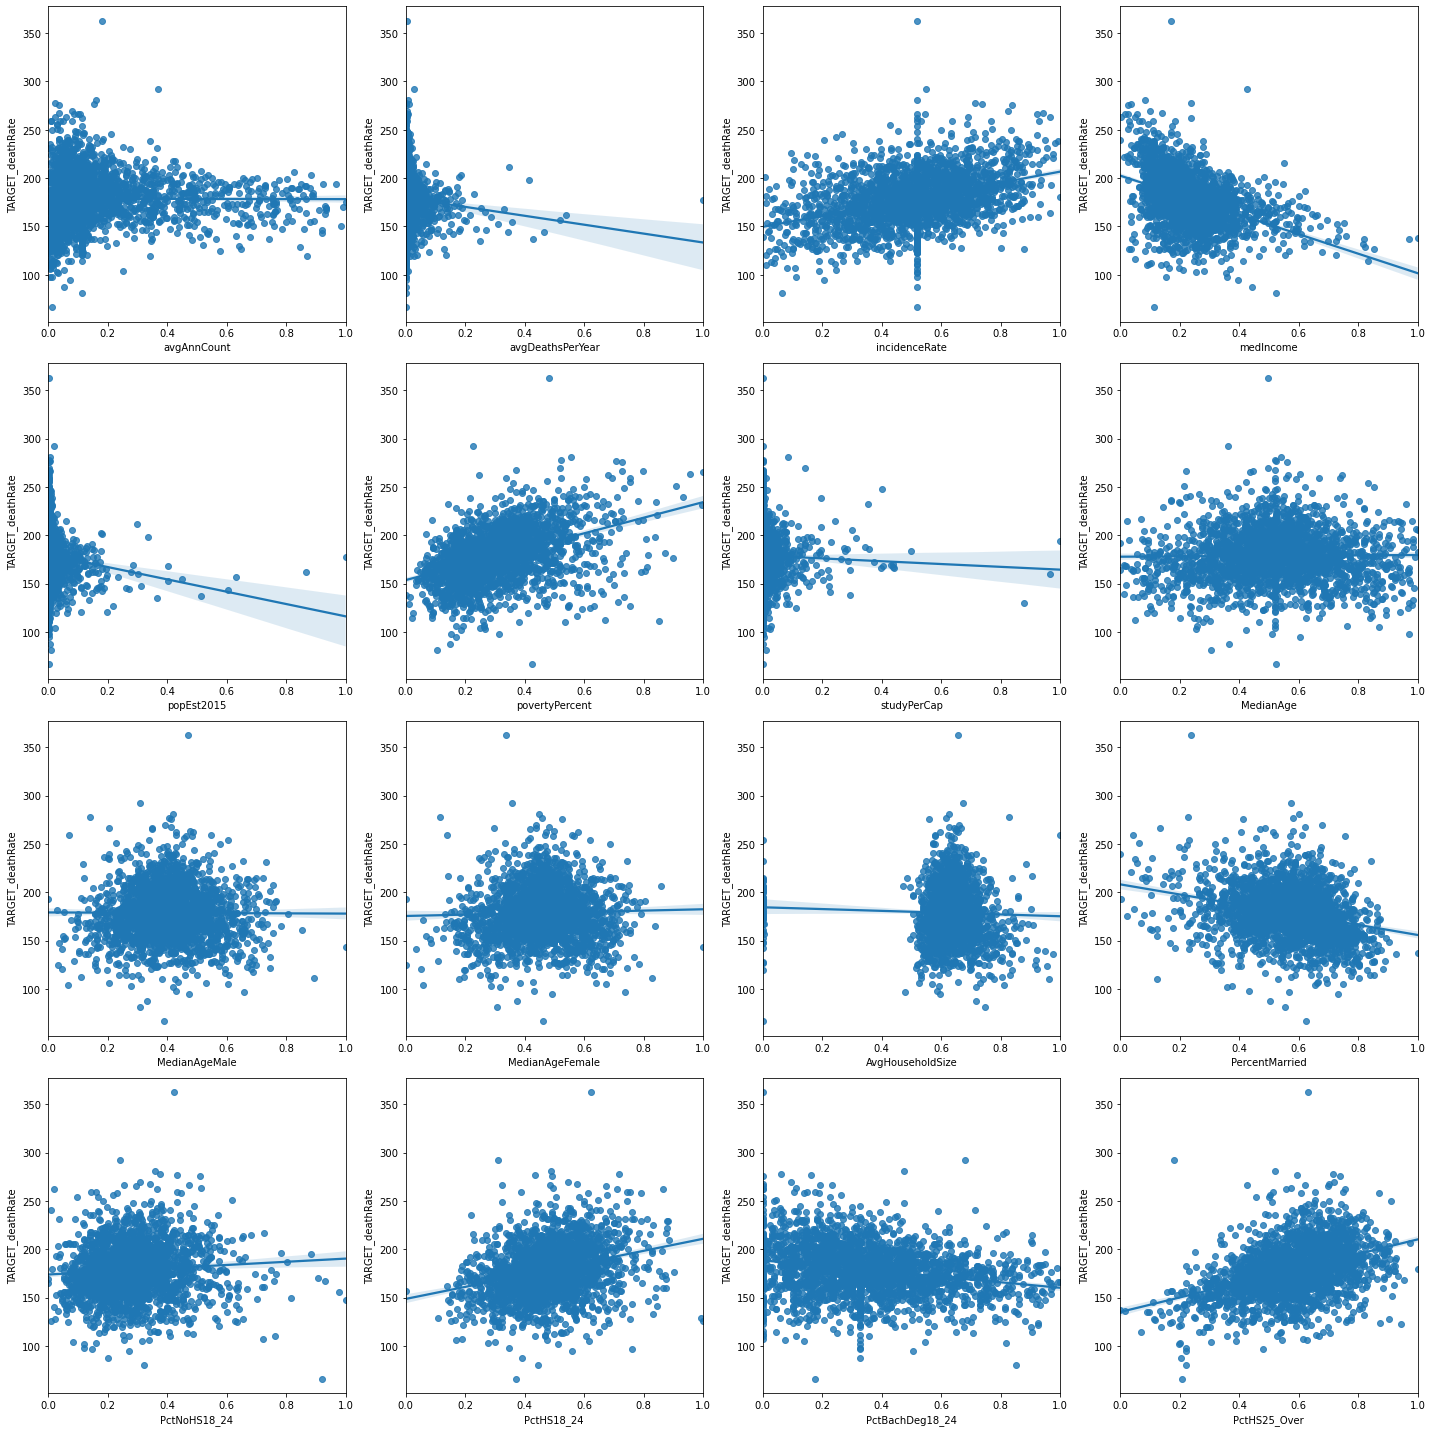

In [221]:
fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['avgAnnCount'], ax = axs[0, 0])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['avgDeathsPerYear'], ax = axs[0, 1])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['incidenceRate'], ax = axs[0, 2])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['medIncome'], ax = axs[0, 3])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['popEst2015'], ax = axs[1, 0])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['povertyPercent'], ax = axs[1, 1])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['studyPerCap'], ax = axs[1, 2])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['MedianAge'], ax = axs[1, 3])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['MedianAgeMale'], ax = axs[2, 0])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['MedianAgeFemale'], ax = axs[2, 1])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['AvgHouseholdSize'], ax = axs[2, 2])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['PercentMarried'], ax = axs[2, 3])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['PctNoHS18_24'], ax = axs[3, 0])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['PctHS18_24'], ax = axs[3, 1])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['PctBachDeg18_24'], ax = axs[3, 2])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['PctHS25_Over'], ax = axs[3, 3])
plt.tight_layout();

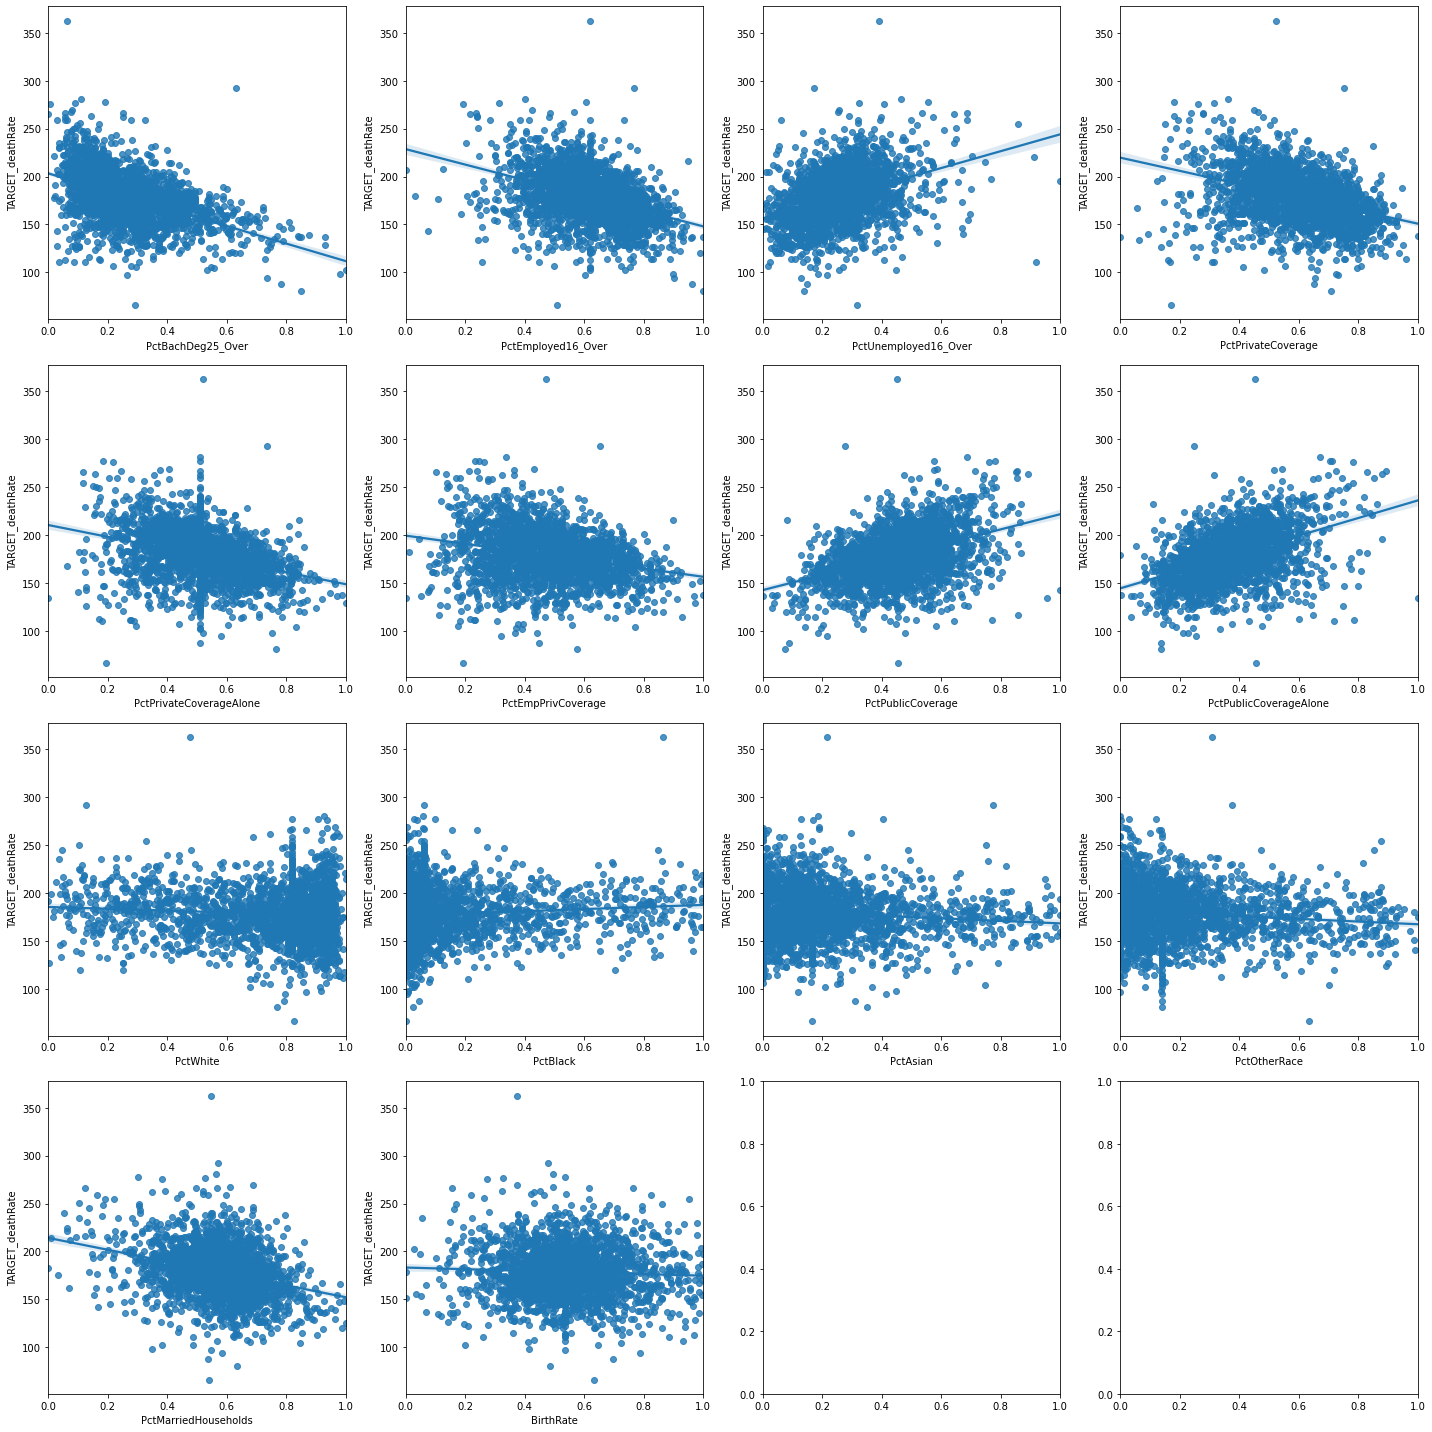

In [222]:
fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['PctBachDeg25_Over'], ax = axs[0, 0])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['PctEmployed16_Over'], ax = axs[0, 1])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['PctUnemployed16_Over'], ax = axs[0, 2])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['PctPrivateCoverage'], ax = axs[0, 3])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['PctPrivateCoverageAlone'], ax = axs[1, 0])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['PctEmpPrivCoverage'], ax = axs[1, 1])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['PctPublicCoverage'], ax = axs[1, 2])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['PctPublicCoverageAlone'], ax = axs[1, 3])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['PctWhite'], ax = axs[2, 0])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['PctBlack'], ax = axs[2, 1])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['PctAsian'], ax = axs[2, 2])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['PctOtherRace'], ax = axs[2, 3])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['PctMarriedHouseholds'], ax = axs[3, 0])
sns.regplot(y = cancer_data['TARGET_deathRate'], x = x['BirthRate'], ax = axs[3, 1])

plt.tight_layout();

### Split the data into Train and Test Sets

In [223]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 57)
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (1828, 30)
x_test:  (457, 30)
y_train:  (1828,)
y_test:  (457,)


## Task 2

### Build any Machine Learning Model of your choice

In [224]:
model = LinearRegression(normalize = True)
model.fit(x_train, y_train)

LinearRegression(normalize=True)

In [262]:
y_pred = model.predict(x_test)

#### Model Interpretation

In [225]:
print("Model intercept  : ", model.intercept_, "\n")
print("Model coefficient: ", model.coef_, "\n")

for i in range(len(x.columns)):
    print(x.columns[i], ": ", model.coef_[i])

Model intercept  :  173.9692293449597 

Model coefficient:  [  1.49527058  84.1501281   44.21727873   4.73047796 -93.14066198
  21.13304232  -1.55615567   6.67620041 -10.63779227 -26.86494098
   0.52186989  74.13917526 -10.26284268  22.91803881  -4.81599184
  30.16789053 -29.16353701 -34.00748209   5.4422674  -42.46210197
   9.66038118  38.99125313   9.24222646  -1.53933138  -5.01883691
   9.73955579   1.29866435  -3.41693945 -81.96567065  -6.06406109] 

avgAnnCount :  1.4952705804818323
avgDeathsPerYear :  84.15012809735111
incidenceRate :  44.21727873246691
medIncome :  4.730477960580658
popEst2015 :  -93.14066198044654
povertyPercent :  21.133042320445824
studyPerCap :  -1.5561556678178974
MedianAge :  6.676200414810063
MedianAgeMale :  -10.637792272876121
MedianAgeFemale :  -26.864940979270305
AvgHouseholdSize :  0.5218698912616191
PercentMarried :  74.13917525623543
PctNoHS18_24 :  -10.262842678977341
PctHS18_24 :  22.918038806879093
PctBachDeg18_24 :  -4.815991835844235
PctHS25_O

### Evaluate your model with various Evaluation Metrics

In [264]:
from sklearn.metrics import r2_score
print('r2_score=',r2_score(y_test, y_pred))

# import metrics library
from sklearn import metrics

# print result of MAE
print('MAE=',metrics.mean_absolute_error(y_test, y_pred))

#print result of MSE
print('MSE=',metrics.mean_squared_error(y_test, y_pred))

#print result of RMSE
print('RMSE=',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2_score= 0.4962436079643242
MAE= 13.754383547072601
MSE= 371.20178656513366
RMSE= 19.266597690436516


### Try out other Machine Learning Models and Evaluate them

#### Random Forest Model

In [232]:
rfc = RandomForestRegressor(max_depth=20,n_estimators=100, random_state=57)
rfc.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, random_state=57)

In [275]:
y_rf_pred = rfc.predict(x_test)

In [276]:
from sklearn.metrics import r2_score
print('r2_score=',r2_score(y_test, y_rf_pred))

# import metrics library
from sklearn import metrics

# print result of MAE
print('MAE=',metrics.mean_absolute_error(y_test, y_rf_pred))

#print result of MSE
print('MSE=',metrics.mean_squared_error(y_test, y_rf_pred))

#print result of RMSE
print('RMSE=',np.sqrt(metrics.mean_squared_error(y_test, y_rf_pred)))

r2_score= 0.5486366884249879
MAE= 13.122707172567454
MSE= 332.59502071932815
RMSE= 18.237187851182764


### XGBoost

In [278]:
import xgboost
xg_regressor=xgboost.XGBRegressor()

In [280]:
xg_regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [281]:
y_xg_pred = xg_regressor.predict(x_test)

In [282]:
from sklearn.metrics import r2_score
print('r2_score=',r2_score(y_test, y_xg_pred))

# import metrics library
from sklearn import metrics

# print result of MAE
print('MAE=',metrics.mean_absolute_error(y_test, y_xg_pred))

#print result of MSE
print('MSE=',metrics.mean_squared_error(y_test, y_xg_pred))

#print result of RMSE
print('RMSE=',np.sqrt(metrics.mean_squared_error(y_test, y_xg_pred)))

r2_score= 0.48549605195032464
MAE= 13.638677647964176
MSE= 379.12131286133393
RMSE= 19.47103779620732


RandomForestRegressor r2_score= 0.55

LinearRegression r2_score= 0.50 

XGBRegressor: r2_score= 0.49 

Random Forest performs best as compared to others

## Task 3

### Perform Hyperparameter Tuning

#### Using GridSearchCV on Random Forest Model

In [287]:
r_forest = RandomForestRegressor()
r_forest.fit(x_train,y_train)

RandomForestRegressor()

In [288]:
parameters = {"criterion": ["mse","mae"],
              "max_depth": [15,20,25,None],
              "n_estimators":[100,150,200]}
parameters

{'criterion': ['mse', 'mae'],
 'max_depth': [15, 20, 25, None],
 'n_estimators': [100, 150, 200]}

In [291]:
grid = GridSearchCV(r_forest,param_grid=parameters,cv=5,n_jobs=4)

In [292]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [15, 20, 25, None],
                         'n_estimators': [100, 150, 200]})

In [293]:
grid.best_params_

{'criterion': 'mse', 'max_depth': 20, 'n_estimators': 150}

In [294]:
grid.best_score_

0.47870852117819246

In [295]:
grid.best_estimator_

RandomForestRegressor(max_depth=20, n_estimators=150)

In [296]:
print("Train accuracy: ",grid.score(x_train,y_train))
print("Test accuracy: ",grid.score(x_test,y_test))

Train accuracy:  0.9290227000610264
Test accuracy:  0.5408010862822882


#### Using RandomizedSearchCV on Decision Tree Model

In [297]:
r_forest = RandomForestRegressor()
r_forest.fit(x_train,y_train)

RandomForestRegressor()

In [298]:
parameters = {"criterion": ["mse","mae"],
              "max_depth": [15,20,25,None],
              "n_estimators":[100,150,200]}
parameters

{'criterion': ['mse', 'mae'],
 'max_depth': [15, 20, 25, None],
 'n_estimators': [100, 150, 200]}

In [301]:
rd_grid = RandomizedSearchCV(r_forest,param_distributions=parameters,cv=5,n_jobs=4)

In [302]:
rd_grid.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [15, 20, 25, None],
                                        'n_estimators': [100, 150, 200]})

In [303]:
rd_grid.best_params_

{'n_estimators': 150, 'max_depth': None, 'criterion': 'mse'}

In [304]:
rd_grid.best_score_

0.48160801433529005

In [305]:
rd_grid.best_estimator_

RandomForestRegressor(n_estimators=150)

In [306]:
print("Train accuracy: ",rd_grid.score(x_train,y_train))
print("Test accuracy: ",rd_grid.score(x_test,y_test))

Train accuracy:  0.9302468916785225
Test accuracy:  0.5402042935179189


## Test data prediction with Random Forest

In [309]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')
test_data.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,2092.000000,763,341.000000,34368,842304,33.5,42.739913,"(34218.1, 37413.8]",28.8,27.4,...,NaN,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886
1,94.000000,41,445.200000,35615,16704,21.5,0.000000,"(34218.1, 37413.8]",41.5,40.9,...,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
2,126.000000,43,425.700000,76672,32154,7.6,31.100330,"(61494.5, 125635]",35.0,34.2,...,68.0,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567
3,1962.667684,16,453.549422,45856,5428,11.4,0.000000,"(45201, 48021.6]",44.7,44.2,...,55.3,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231
4,1962.667684,4,453.549422,53739,1670,10.9,0.000000,"(51046.4, 54545.6]",535.2,44.7,...,56.7,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499


In [310]:
 test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              762 non-null    float64
 1   avgDeathsPerYear         762 non-null    int64  
 2   incidenceRate            762 non-null    float64
 3   medIncome                762 non-null    int64  
 4   popEst2015               762 non-null    int64  
 5   povertyPercent           762 non-null    float64
 6   studyPerCap              762 non-null    float64
 7   binnedInc                762 non-null    object 
 8   MedianAge                762 non-null    float64
 9   MedianAgeMale            762 non-null    float64
 10  MedianAgeFemale          762 non-null    float64
 11  Geography                762 non-null    object 
 12  AvgHouseholdSize         762 non-null    float64
 13  PercentMarried           762 non-null    float64
 14  PctNoHS18_24             7

In [311]:
test_data.drop(columns=['PctSomeCol18_24','Geography','binnedInc'], axis=1, inplace=True)

In [312]:
test_data.isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over          33
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    148
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRate                    0
dtype: int64

In [313]:
test_data['PctEmployed16_Over']=test_data['PctEmployed16_Over'].fillna(test_data['PctEmployed16_Over'].mean())

In [314]:
test_data['PctPrivateCoverageAlone']=test_data['PctPrivateCoverageAlone'].fillna(test_data['PctPrivateCoverageAlone'].mean())

In [315]:
test_data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [316]:
test_predict_rf =r_forest.predict(test_data)

#Putting the above predictions and probabilities together to create a readable df
pred_label = pd.DataFrame(test_predict_rf.reshape(len(test_predict_rf),1))
pred_label.rename(columns={0:'prediction'}, inplace=True)
pred_label

,prediction
0,202.375
1,204.584
2,203.822
3,203.672
4,203.908
...,...
757,203.275
758,204.089
759,204.086
760,204.939


In [317]:
pred_label.columns = ["prediction"]
pred_label.to_csv("prediction.ANJUM_ROHRA.csv", index = False)  

## Task 4

### Use any Feature Selection Technique and observe if the model created by selected features performs better than the previous model

In [307]:
corr=cancer_data.corr()
corr.style.background_gradient(cmap="RdYlGn")

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
avgAnnCount,1.000000,0.120240,0.166883,0.193142,0.104420,-0.117231,0.058356,-0.193845,-0.189596,-0.197827,0.058977,-0.122548,-0.226225,-0.112533,0.227266,-0.219800,0.234664,0.115932,0.073639,0.167159,0.198764,0.242879,-0.162702,-0.104780,-0.099088,0.201002,0.348036,0.127114,-0.071170,-0.027284,-0.003339
avgDeathsPerYear,0.120240,1.000000,0.083680,0.252805,0.971555,-0.083053,0.063562,-0.161142,-0.152949,-0.150087,0.082451,-0.185945,-0.151146,-0.151250,0.261832,-0.313592,0.318363,0.130272,0.077583,0.078127,0.131519,0.186627,-0.148174,-0.044359,-0.243728,0.249662,0.199156,0.107117,-0.163633,-0.045927,-0.075079
incidenceRate,0.166883,0.083680,1.000000,-0.004737,0.041139,0.012606,0.067937,0.013852,0.001740,0.019157,-0.087414,-0.113619,-0.150356,0.042476,0.099648,0.127575,-0.044130,-0.000584,0.099819,0.077507,0.060410,0.139743,0.067607,0.062606,0.026480,0.062613,0.061365,-0.119518,-0.146480,-0.070190,0.388100
medIncome,0.193142,0.252805,-0.004737,1.000000,0.284803,-0.789982,0.041315,-0.123843,-0.089741,-0.153882,0.115394,0.363272,-0.290246,-0.193868,0.415402,-0.474731,0.710364,0.676761,-0.454950,0.726618,0.707640,0.748979,-0.755374,-0.721523,0.014547,0.099965,0.221711,0.108583,0.452120,0.000296,-0.431586
popEst2015,0.104420,0.971555,0.041139,0.284803,1.000000,-0.090026,0.058396,-0.199590,-0.191991,-0.195374,0.111340,-0.165552,-0.147426,-0.159984,0.249743,-0.347895,0.341567,0.156116,0.054303,0.084061,0.151604,0.198317,-0.193276,-0.069644,-0.249710,0.234361,0.166443,0.109872,-0.127893,-0.032453,-0.115593
povertyPercent,-0.117231,-0.083053,0.012606,-0.789982,-0.090026,1.000000,-0.059989,-0.173160,-0.214312,-0.145207,0.062109,-0.646724,0.275138,0.097011,-0.381352,0.195823,-0.532264,-0.717779,0.650561,-0.819262,-0.675889,-0.679636,0.649541,0.797428,-0.260379,0.027950,-0.131719,-0.004814,-0.608973,-0.027741,0.428083
studyPerCap,0.058356,0.063562,0.067937,0.041315,0.058396,-0.059989,1.000000,-0.009130,-0.021793,-0.018451,0.001797,-0.038103,-0.077189,-0.043152,0.082623,-0.084706,0.109318,0.085393,-0.035757,0.096917,0.066568,0.093400,-0.052599,-0.065529,0.026125,0.005783,0.065244,-0.021112,-0.049972,0.027688,-0.029654
MedianAge,-0.193845,-0.161142,0.013852,-0.123843,-0.199590,-0.173160,-0.009130,1.000000,0.897931,0.892988,-0.336284,0.395619,0.057787,0.225788,-0.084920,0.324407,-0.138465,-0.172755,-0.120804,0.095631,-0.119789,-0.205065,0.371002,-0.002353,0.318450,-0.205030,-0.258989,-0.225623,0.180159,-0.121687,0.012099
MedianAgeMale,-0.189596,-0.152949,0.001740,-0.089741,-0.191991,-0.214312,-0.021793,0.897931,1.000000,0.929017,-0.330042,0.448808,0.097468,0.242203,-0.084341,0.325026,-0.140804,-0.170750,-0.122137,0.081668,-0.144576,-0.218991,0.395370,0.000909,0.331229,-0.211842,-0.261071,-0.230530,0.221688,-0.131474,-0.005364
MedianAgeFemale,-0.197827,-0.150087,0.019157,-0.153882,-0.195374,-0.145207,-0.018451,0.892988,0.929017,1.000000,-0.352530,0.367033,0.143260,0.247430,-0.126727,0.354695,-0.193079,-0.259134,-0.094411,0.041375,-0.187056,-0.269994,0.457406,0.047570,0.288448,-0.185797,-0.265392,-0.210390,0.154734,-0.127624,0.030528


In [308]:
corr['TARGET_deathRate'].sort_values(ascending=False)       

TARGET_deathRate           1.000000
PctPublicCoverageAlone     0.456076
povertyPercent             0.428083
PctPublicCoverage          0.418348
PctHS25_Over               0.406299
incidenceRate              0.388100
PctUnemployed16_Over       0.379586
PctHS18_24                 0.284848
PctBlack                   0.085995
PctNoHS18_24               0.076309
MedianAgeFemale            0.030528
MedianAge                  0.012099
avgAnnCount               -0.003339
MedianAgeMale             -0.005364
studyPerCap               -0.029654
AvgHouseholdSize          -0.037925
BirthRate                 -0.049304
avgDeathsPerYear          -0.075079
PctWhite                  -0.080509
PctAsian                  -0.097244
PctOtherRace              -0.110662
popEst2015                -0.115593
PctBachDeg18_24           -0.225676
PctEmpPrivCoverage        -0.259023
PercentMarried            -0.274256
PctMarriedHouseholds      -0.307359
PctPrivateCoverageAlone   -0.323492
PctPrivateCoverage        -0

#### Recursive Feature Elimination on Random Forest

In [320]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= r_forest, step = 1) 
#lr_reg
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable. 

# Fit the function for ranking the features
fit = rfe.fit(x_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 15
Selected Features: [False  True  True  True  True  True False False False  True  True False
 False  True False  True  True False  True  True False False False  True
 False  True False False  True False]
Feature Ranking: [10  1  1  1  1  1 16 14 15  1  1  2  7  1  4  1  1  3  1  1 13 11  9  1
  6  1 12  5  1  8]


#### Representing feature ranks in the form of a table

In [321]:
selected_rfe_features = pd.DataFrame({'Feature':list(x_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
10,AvgHouseholdSize,1
18,PctUnemployed16_Over,1
16,PctBachDeg25_Over,1
15,PctHS25_Over,1
28,PctMarriedHouseholds,1
13,PctHS18_24,1
19,PctPrivateCoverage,1
9,MedianAgeFemale,1
23,PctPublicCoverageAlone,1
25,PctBlack,1


In [322]:
# Transforming the data
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

# Fitting our baseline model with the transformed data
rf_rfe_model =  r_forest.fit(x_train_rfe, y_train)

In [323]:
# making predictions and evaluating the model   #r2 score shows that this features are not better than our modelto make a predict
y_pred_rfe = rf_rfe_model.predict(x_test_rfe)      

print('r2_score=',r2_score(y_test, y_pred_rfe))

print('MAE=',metrics.mean_absolute_error(y_test, y_pred_rfe))

print('MSE=',metrics.mean_squared_error(y_test, y_pred_rfe))

print('RMSE=',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe)))

r2_score= 0.5389807156690039
MAE= 13.16743982494529
MSE= 339.71019463019684
RMSE= 18.431228787853424


In [324]:
testdata_rfe = rfe.transform(test_data)

In [325]:
rfe_testdata =r_forest.predict(testdata_rfe)

#Putting the above predictions and probabilities together to create a readable df
pred_label2 = pd.DataFrame(rfe_testdata.reshape(len(rfe_testdata),1))
pred_label2.rename(columns={0:'prediction'}, inplace=True)
pred_label2

,prediction
0,198.354
1,199.039
2,199.039
3,198.316
4,198.400
...,...
757,198.354
758,198.526
759,198.354
760,199.039


In [326]:
pred_label2.columns = ["prediction"]
pred_label2.to_csv("prediction.ANJUM_ROHRA.csv", index = False)   